In [81]:
import os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
import string
import re

import pygraphviz as pgv
from IPython.display import Image

In [2]:
files={}
dataset_dir="./OpinosisDataset1.0_0/topics"
for filename in os.listdir(dataset_dir):
    lines=[]
    with open(dataset_dir+"/"+filename) as f:
        lines = f.read().splitlines()
    files[filename]=lines



In [21]:
files['accuracy_garmin_nuvi_255W_gps.txt.data']

[', and is very, very accurate .',
 ' but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .',
 " This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .",
 ' It provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle .',
 " I've used other GPS units, as well as GPS built into cars   and to this day NOTHING beats the accuracy of a Garmin GPS .",
 ' It got me from point A to point B with 100% accuracy everytime .',
 ' It has yet to disappoint, getting me everywhere with 100% accuracy .',
 '0 out of 5 stars Honest, accurate review, , PLEASE READ !',
 " Aside from that, every destination I've thrown at has been 100% accurate .",
 'In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .',
 " Plus, I've always hea

In [152]:
def pos_tag(text):
    output=[]
    text = nltk.word_tokenize(text)
    tags = nltk.pos_tag(text)
    for tag in tags:
        output.append(str(tag[0]+"/"+tag[1]))
    return output

def filter_path(path):
    #1. . ∗ (/nn) + . ∗ (/vb) + . ∗ (/jj) + .∗
    #2. . ∗ (/jj) + . ∗ (/to) + . ∗ (/vb).∗
    #3. . ∗ (/rb) ∗ . ∗ (/jj) + . ∗ (/nn) + .∗
    #4. . ∗ (/rb) + . ∗ (/in) + . ∗ (/nn) + .∗
    string = " ".join(path)
    
    #RULE 1
    regex = re.compile(".*/NN.*/VB.*/JJ.*")
    if regex.search(string):
        return True
        

and is very very accurate 
but for the most part we find that the garmin software provides accurate directions whereever we intend to go 
this function is not accurate if you dont leave it in battery mode say when you stop at the cracker barrell for lunch and to play one of those trangle games with the tees 
it provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle 
ive used other gps units as well as gps built into cars   and to this day nothing beats the accuracy of a garmin gps 
it got me from point a to point b with 100 accuracy everytime 
####
[('START', 0.0018268467693546625), ('but/CC', 0.0021556862953014946), ('ive/NN', 0.0021556862953014946), ('used/VBN', 0.0037669967659923606), ('other/JJ', 0.005217159184496131), ('in/IN', 0.005442119488015952), ('got/VBD', 0.005442119488015952), ('day/NN', 0.005736324753885723), ('function/NN', 0.005736324753885723), ('gps/JJ', 0.0065222639709566045), ('me/PRP', 0.006724595144058726)

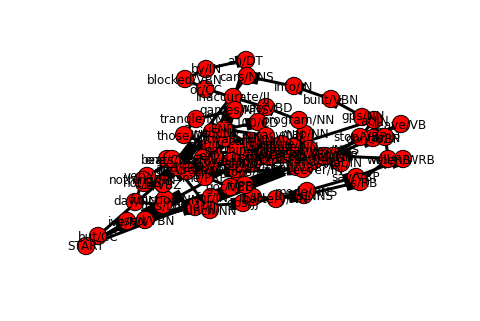

In [158]:
import string

ind=0
G=nx.DiGraph()
for sent in files['accuracy_garmin_nuvi_255W_gps.txt.data']:
    #remove pontuation
    sent= sent.translate(None, string.punctuation)
    #remove left space
    sent = sent.lstrip()
    #to lower
    sent = sent.lower()
    
    
    print sent
    words= pos_tag(sent)
    #words = sent.split(" ")
    #print words
    for i in xrange(0,len(words)-1) :

        if i== 0: 
            G.add_edge("START",words[i])
        else:
            G.add_edge(words[i-1],words[i])
            
    G.add_edge(words[i],"END")
    ind=ind+1
    if ind > 5:
        break

nx.draw(G, with_labels = True, width=3, arrows=True) 


print "####"
for path in nx.all_simple_paths(G, source="START", target="END"):
    #print(path)
    filter_path(path)
    #filter_path(path):
    #    print(path)


pr = nx.pagerank(G, alpha=0.9)
#print pr
import operator
print sorted(pr.items(), key=operator.itemgetter(1))